<a href="https://colab.research.google.com/github/BenMeehan/Exploratory-Data-Analysis/blob/main/CF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset URL**

https://www.kaggle.com/shashwatwork/web-page-phishing-detection-dataset

https://data.mendeley.com/datasets/c2gw7fy2j4/3

In [11]:
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv("dataset_phishing.csv")
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [13]:
df.shape

(11430, 89)

In [14]:
# Replacing the classes with numbers for easier processing

def replaceStatus(data):
    if data == "legitimate":
        return 0
    else: return 1

df["status"] = list(map(replaceStatus,df["status"]))

In [15]:
df=df.fillna(0)

In [16]:
X = df.iloc[:,1:88].values
Y = df.iloc[:,88].values

In [17]:
X

array([[ 37.,  19.,   0., ...,   1.,   1.,   4.],
       [ 77.,  23.,   1., ...,   0.,   1.,   2.],
       [126.,  50.,   1., ...,   0.,   1.,   0.],
       ...,
       [105.,  16.,   1., ...,   0.,   1.,  10.],
       [ 38.,  30.,   0., ...,   0.,   0.,   4.],
       [477.,  14.,   1., ...,   1.,   1.,   0.]])

In [18]:
Y

array([0, 1, 1, ..., 0, 0, 1])

In [19]:
# Train - Test Split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.25,random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

# Visualizing the data

In [21]:
# Visualizing the training data using t-SNE

from sklearn.manifold import TSNE
tsne_model=TSNE(n_components=2,random_state=0)

tsne_data=tsne_model.fit_transform(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [22]:
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
tsne_df

,Dim_1,Dim_2,label
0,-29.264412,-5.643948,0.0
1,22.536224,-32.430943,0.0
2,-55.090218,35.669502,0.0
3,-9.712357,24.590193,0.0
4,-4.658282,-56.767483,1.0
...,...,...,...
8567,-42.192303,5.623889,0.0
8568,54.879944,-30.660089,0.0
8569,33.441128,-48.444798,1.0
8570,-36.512905,5.732620,1.0


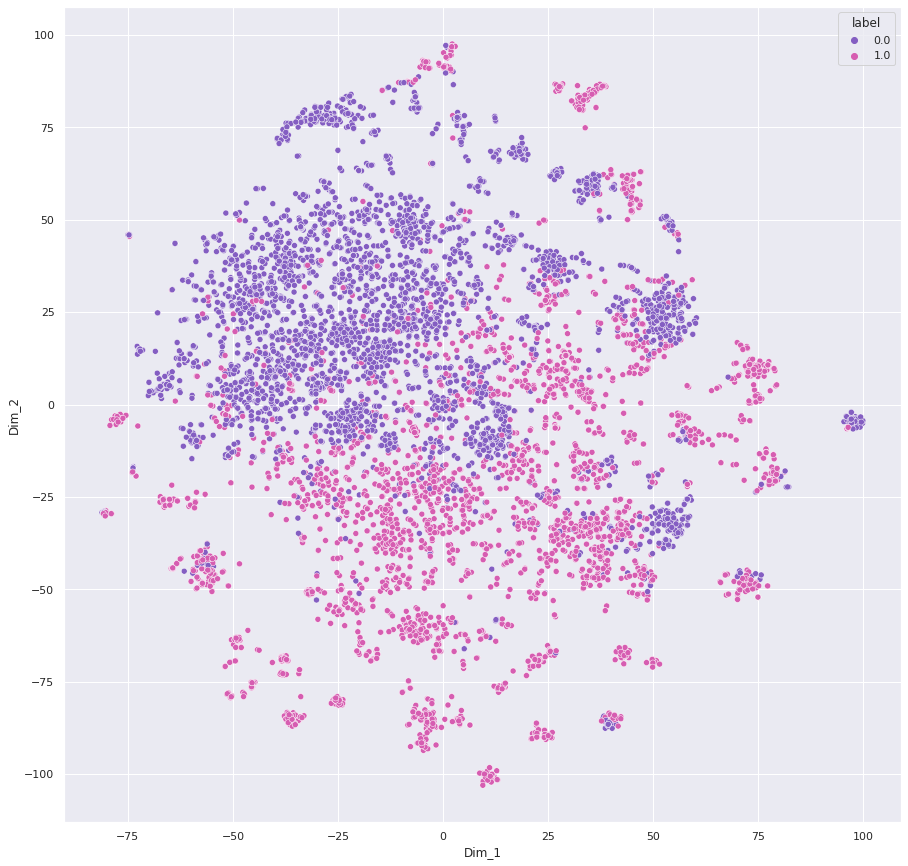

In [23]:
import seaborn as sns
colors=['#845EC2','#D65DB1']
sns.set(rc = {'figure.figsize':(15,15)})
sns.scatterplot(data=tsne_df,x='Dim_1',y="Dim_2",hue="label",palette=colors)

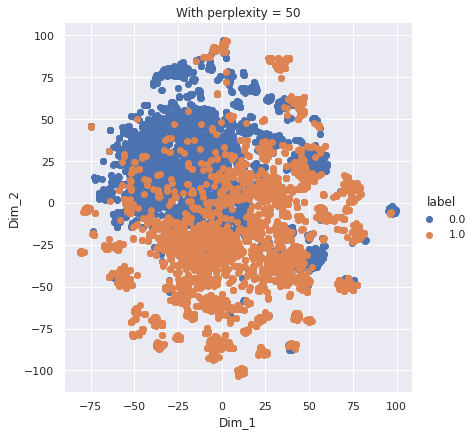

In [36]:
import matplotlib.pyplot as plt
sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

# Descision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
dt_classifier = DecisionTreeClassifier(random_state =0)
dt_classifier.fit(x_train,y_train)
y_predict = dt_classifier.predict(x_test)
accuracy_score(y_test,y_predict)

0.9097270818754374

# Random Forests

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=10)
rf_classifier.fit(x_train,y_train)
y_pred = rf_classifier.predict(x_test)
accuracy_score(y_test , y_pred)

0.9562631210636809

# K-Nearest Neighbours

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)
y_predict = knn_classifier.predict(x_test)
accuracy_score(y_test , y_predict)

0.9454163750874738

# Guassian Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()
gnb_classifier.fit(x_train,y_train)
y_predict = gnb_classifier.predict(x_test)
accuracy_score(y_test , y_predict)

0.4993002099370189

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(random_state =0).fit(x_train,y_train)
y_predict=logistic_classifier.predict(x_test)
print(accuracy_score(y_test,y_predict))

0.9461161651504548


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Report and Confusion Matrix

In [30]:
def results(name, model):
    preds = model.predict(x_test)

    print(name + " score: %.3f" % model.score(x_test, y_test))
    print(classification_report(y_test, preds,zero_division=1))
    labels = ['Legitimate', 'Phishing']

    conf_matrix = confusion_matrix(y_test, preds)

    plt.figure(figsize= (10,6))
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d", cmap='Reds')
    plt.title("Confusion Matrix for " + name)
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    print("\n\n")

Logistic Regression score: 0.946
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1430
           1       0.95      0.94      0.95      1428

    accuracy                           0.95      2858
   macro avg       0.95      0.95      0.95      2858
weighted avg       0.95      0.95      0.95      2858



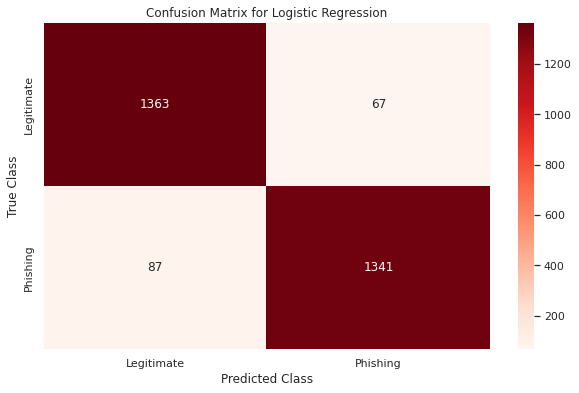




Decision Tree score: 0.910
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1430
           1       0.90      0.92      0.91      1428

    accuracy                           0.91      2858
   macro avg       0.91      0.91      0.91      2858
weighted avg       0.91      0.91      0.91      2858



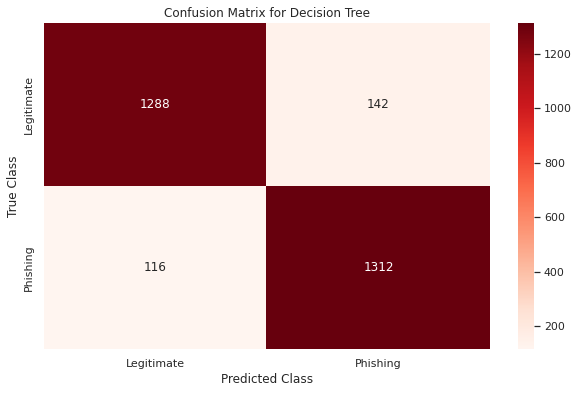




Random Forests score: 0.956
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1430
           1       0.96      0.95      0.96      1428

    accuracy                           0.96      2858
   macro avg       0.96      0.96      0.96      2858
weighted avg       0.96      0.96      0.96      2858



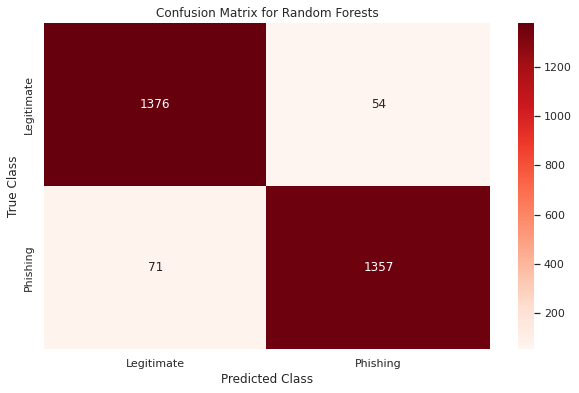




K Nearest Neighbour score: 0.945
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1430
           1       0.95      0.94      0.94      1428

    accuracy                           0.95      2858
   macro avg       0.95      0.95      0.95      2858
weighted avg       0.95      0.95      0.95      2858



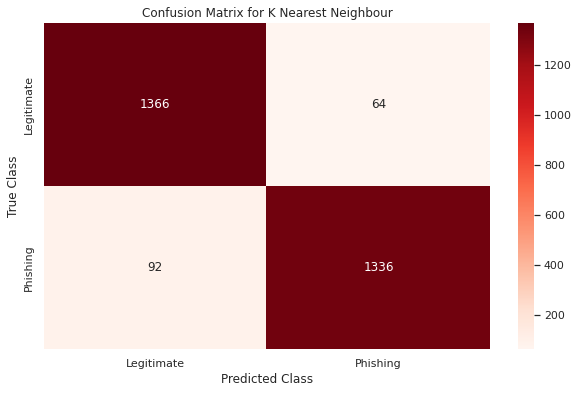




Naive Bayes score: 0.499
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1430
           1       0.50      1.00      0.67      1428

    accuracy                           0.50      2858
   macro avg       0.25      0.50      0.33      2858
weighted avg       0.25      0.50      0.33      2858



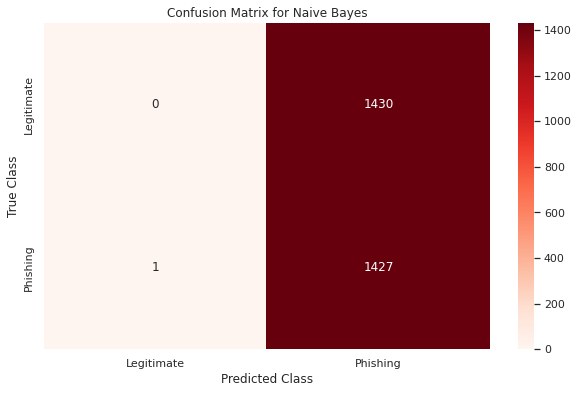

In [31]:
results("Logistic Regression" , logistic_classifier)
results("Decision Tree" , dt_classifier)
results("Random Forests" , rf_classifier)
results("K Nearest Neighbour" , knn_classifier)
results("Naive Bayes" , gnb_classifier)

In [32]:
print("Random Forest seems to give the best performance")

Random Forest seems to give the best performance
